# MECO

Feature extraction and data preparation for the MECO dataset

We chose the "joint_data_trimmed.dat" file in the MECO website (https://meco-read.com/).

Interesting paper that describe the dataset, https://link.springer.com/epdf/10.3758/s13428-021-01772-6?sharing_token=As4e3osuA15IaUCKtCvDT5AH0g46feNdnc402WrhzyoEtpF3alySPm1lAWocS1ewk9OZlpPc3CqibACC23iBC_nacc6BD4_GPYLuUZJAvfWHoa8e0hjmhhFn9fLIgIRd3VzSfjlcpQ3gS4EiUY2YpRXjDSh3hB5Zx5kZpkk4yIQ=.

## Import Libs and Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("joint_data_trimmed.csv", index_col=0)

We have chose to use the following features for each sample:

- **Skipping**: a binary index of whether the word was fixated at least once during the entire reading of the text [and not only during the first pass].
- **First Fixation**: the duration of the first fixation landing on the word.
- **Gaze Duration**: the summed duration of fixations on the word in the first pass, i.e., before the gaze leaves it for the first time.
- **Total Fixation Duration**: the summed duration of all fixations on the word.
- **First-run Number of Fixation**: the number of fixations on a word during the first pass.
- **Total Number of Fixations**: number of fixations on a word overall.
- **Regression**: a binary index of whether the gaze returned to the word after inspecting further textual material.
- **Rereading**: a binary index of whether the word elicited fixations after the first pass.


In [3]:
# following a paper cited on the MECO website, i will use a subset of the gaze features
gaze_features = ["skip", "firstfix.dur", "firstrun.dur", "dur", "firstrun.nfix", "nfix", "refix", "reread"]
basic_features = ["trialid", "sentnum", "ianum", "ia", "lang", "uniform_id"]
df = df[basic_features + gaze_features]

In [4]:
df.head()

,trialid,sentnum,ianum,ia,lang,uniform_id,skip,firstfix.dur,firstrun.dur,dur,firstrun.nfix,nfix,refix,reread
1,1.0,1.0,1.0,Janus,du,du_1,0.0,154.0,154.0,400.0,1.0,2.0,0.0,1.0
2,1.0,1.0,2.0,is,du,du_1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,3.0,in,du,du_1,0.0,551.0,551.0,551.0,1.0,1.0,0.0,0.0
4,1.0,1.0,4.0,de,du,du_1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,1.0,5.0,oude,du,du_1,0.0,189.0,189.0,439.0,1.0,2.0,0.0,1.0


## Data Understanding

We can notice that there are some Null elements, for the gaze_features except skip, those Null elements are in the rows with skip == 1, representing the fact that cannot be captured.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855123 entries, 1 to 855123
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   trialid        855122 non-null  float64
 1   sentnum        855122 non-null  float64
 2   ianum          855122 non-null  float64
 3   ia             854741 non-null  object 
 4   lang           855122 non-null  object 
 5   uniform_id     855123 non-null  object 
 6   skip           855122 non-null  float64
 7   firstfix.dur   639530 non-null  float64
 8   firstrun.dur   639530 non-null  float64
 9   dur            639530 non-null  float64
 10  firstrun.nfix  639530 non-null  float64
 11  nfix           639530 non-null  float64
 12  refix          639454 non-null  float64
 13  reread         639530 non-null  float64
dtypes: float64(11), object(3)
memory usage: 97.9+ MB


In [6]:
df.describe()

,trialid,sentnum,ianum,skip,firstfix.dur,firstrun.dur,dur,firstrun.nfix,nfix,refix,reread
count,855122.000000,855122.000000,855122.000000,855122.000000,639530.000000,639530.000000,639530.000000,639530.000000,639530.000000,639454.000000,639530.000000
mean,6.319812,5.100584,84.710652,0.252118,214.771812,274.000635,396.190598,1.291295,1.870305,0.270565,0.315846
std,3.440210,2.697842,51.443266,0.434229,94.834265,181.464901,332.095123,0.666067,1.378493,0.444252,0.464852
min,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000
25%,3.000000,3.000000,41.000000,0.000000,156.000000,171.000000,199.000000,1.000000,1.000000,0.000000,0.000000
50%,6.000000,5.000000,82.000000,0.000000,200.000000,229.000000,297.000000,1.000000,1.000000,0.000000,0.000000
75%,9.000000,7.000000,124.000000,1.000000,255.000000,324.000000,478.000000,1.000000,2.000000,1.000000,1.000000
max,12.000000,16.000000,243.000000,1.000000,12688.000000,12688.000000,15579.000000,44.000000,50.000000,1.000000,1.000000


In [7]:
df.lang.unique()

array(['du', 'ee', 'fi', 'ge', 'gr', 'he', 'it', 'ko', 'en', 'no', nan,
       'ru', 'sp', 'tr'], dtype=object)

Get a subset of languages, choosen look a the ones handled by mBERT (https://huggingface.co/bert-base-multilingual-cased).

- **German**
- **Italian**
- **Russian**
- **English**
- **Spanish**

In [8]:
# get only the languages that are necessary to the project
supported_languages = ["ge", "it", "ru", "en", "sp"]

In [9]:
df = df[df.lang.isin(supported_languages)]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402904 entries, 193910 to 823179
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   trialid        402904 non-null  float64
 1   sentnum        402904 non-null  float64
 2   ianum          402904 non-null  float64
 3   ia             402834 non-null  object 
 4   lang           402904 non-null  object 
 5   uniform_id     402904 non-null  object 
 6   skip           402904 non-null  float64
 7   firstfix.dur   292582 non-null  float64
 8   firstrun.dur   292582 non-null  float64
 9   dur            292582 non-null  float64
 10  firstrun.nfix  292582 non-null  float64
 11  nfix           292582 non-null  float64
 12  refix          292539 non-null  float64
 13  reread         292582 non-null  float64
dtypes: float64(11), object(3)
memory usage: 46.1+ MB


In [11]:
df.head()

,trialid,sentnum,ianum,ia,lang,uniform_id,skip,firstfix.dur,firstrun.dur,dur,firstrun.nfix,nfix,refix,reread
193910,1.0,1.0,1.0,In,ge,ge_1,0.0,164.0,164.0,164.0,1.0,1.0,0.0,0.0
193911,1.0,1.0,2.0,der,ge,ge_1,0.0,166.0,166.0,657.0,1.0,3.0,0.0,1.0
193912,1.0,1.0,3.0,alten,ge,ge_1,0.0,144.0,144.0,717.0,1.0,3.0,0.0,1.0
193913,1.0,1.0,4.0,römischen,ge,ge_1,0.0,219.0,219.0,1231.0,1.0,6.0,0.0,1.0
193914,1.0,1.0,5.0,Religion,ge,ge_1,0.0,151.0,151.0,1338.0,1.0,8.0,1.0,1.0


Notice that in the samples' gaze_features with skip == 0 there aren't Null elements.

In [12]:
df[df.skip==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292582 entries, 193910 to 823178
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   trialid        292582 non-null  float64
 1   sentnum        292582 non-null  float64
 2   ianum          292582 non-null  float64
 3   ia             292575 non-null  object 
 4   lang           292582 non-null  object 
 5   uniform_id     292582 non-null  object 
 6   skip           292582 non-null  float64
 7   firstfix.dur   292582 non-null  float64
 8   firstrun.dur   292582 non-null  float64
 9   dur            292582 non-null  float64
 10  firstrun.nfix  292582 non-null  float64
 11  nfix           292582 non-null  float64
 12  refix          292539 non-null  float64
 13  reread         292582 non-null  float64
dtypes: float64(11), object(3)
memory usage: 33.5+ MB


In [13]:
df[df.skip==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110322 entries, 193926 to 823179
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   trialid        110322 non-null  float64
 1   sentnum        110322 non-null  float64
 2   ianum          110322 non-null  float64
 3   ia             110259 non-null  object 
 4   lang           110322 non-null  object 
 5   uniform_id     110322 non-null  object 
 6   skip           110322 non-null  float64
 7   firstfix.dur   0 non-null       float64
 8   firstrun.dur   0 non-null       float64
 9   dur            0 non-null       float64
 10  firstrun.nfix  0 non-null       float64
 11  nfix           0 non-null       float64
 12  refix          0 non-null       float64
 13  reread         0 non-null       float64
dtypes: float64(11), object(3)
memory usage: 12.6+ MB


Even more, there are some ia elements that are Null, we can see that most of them have lot of Null elements, so we can drop them.

In [14]:
print("Probabilities of Null elements by columns, for the Null ia")
df[df.ia.isna()].isna().sum()/df[df.ia.isna()].shape[0]

Probabilities of Null elements by columns, for the Null ia


trialid          0.0
sentnum          0.0
ianum            0.0
ia               1.0
lang             0.0
uniform_id       0.0
skip             0.0
firstfix.dur     0.9
firstrun.dur     0.9
dur              0.9
firstrun.nfix    0.9
nfix             0.9
refix            0.9
reread           0.9
dtype: float64

In [15]:
df = df[~df.ia.isna()]

Fill gaze features of the skipped words with 0.

In [16]:
df = df.fillna(0)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402834 entries, 193910 to 823179
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   trialid        402834 non-null  float64
 1   sentnum        402834 non-null  float64
 2   ianum          402834 non-null  float64
 3   ia             402834 non-null  object 
 4   lang           402834 non-null  object 
 5   uniform_id     402834 non-null  object 
 6   skip           402834 non-null  float64
 7   firstfix.dur   402834 non-null  float64
 8   firstrun.dur   402834 non-null  float64
 9   dur            402834 non-null  float64
 10  firstrun.nfix  402834 non-null  float64
 11  nfix           402834 non-null  float64
 12  refix          402834 non-null  float64
 13  reread         402834 non-null  float64
dtypes: float64(11), object(3)
memory usage: 46.1+ MB


In [18]:
df[["skip", "firstrun.dur", "dur", "firstrun.nfix", "nfix", "refix", "reread"]].corr()

,skip,firstrun.dur,dur,firstrun.nfix,nfix,refix,reread
skip,1.000000,-0.652214,-0.543305,-0.741110,-0.587836,-0.287592,-0.333861
firstrun.dur,-0.652214,1.000000,0.720569,0.860484,0.616886,0.554956,0.224649
dur,-0.543305,0.720569,1.000000,0.648870,0.923882,0.555678,0.629876
firstrun.nfix,-0.741110,0.860484,0.648870,1.000000,0.712458,0.682079,0.256612
nfix,-0.587836,0.616886,0.923882,0.712458,1.000000,0.631961,0.685371
refix,-0.287592,0.554956,0.555678,0.682079,0.631961,1.000000,0.249470
reread,-0.333861,0.224649,0.629876,0.256612,0.685371,0.249470,1.000000


## Group by all users

We will create 4 dataset grouping all the user without distinction, one from all the dataset, the other three are selected from a single language, choosing the italian, german and spanish users, since (as We will see) only users of theese langs are in all trials reading all the sentences.

In [19]:
def group_by_users(dataset):
    group_by_cols = ["trialid", "sentnum", "ianum", "ia", "lang"]
    grouped_cols = ["skip", "firstfix.dur", "firstrun.dur", "dur", "firstrun.nfix", "nfix", "refix", "reread"]

    grouped_clusterd_df = dataset.groupby(group_by_cols)[grouped_cols].mean()

    grouped_clusterd_df = grouped_clusterd_df.reset_index(level=0).reset_index(level=0).reset_index(level=0).reset_index(level=0).reset_index(level=0)

    grouped_clusterd_df["trial_sentnum"] = grouped_clusterd_df["sentnum"]
    grouped_clusterd_df["sentnum"] = grouped_clusterd_df["sentnum"].astype("string") + grouped_clusterd_df["trialid"].astype("string") + grouped_clusterd_df["lang"].astype("string")
    grouped_clusterd_df.sentnum = grouped_clusterd_df.sentnum.astype('category').cat.codes

    word_func = lambda s: [w for w in s["ia"].values.tolist()]
    sentences = grouped_clusterd_df.groupby("sentnum").apply(word_func).tolist()
    print(f"Number of sentence after group : {len(sentences)}")

    return grouped_clusterd_df

### All Langs

In [20]:
grouped_clusterd_df_0 = group_by_users(df)

Number of sentence after group : 511


In [21]:
grouped_clusterd_df_0.shape

(11908, 14)

In [22]:
grouped_clusterd_df_0.rename(columns={"skip" : "prob_skip", "refix" : "prob_refix", "reread" : "prob_reread"}, inplace=True)

grouped_clusterd_df_0.ianum = grouped_clusterd_df_0.ianum.astype(int)
grouped_clusterd_df_0.trialid = grouped_clusterd_df_0.trialid.astype(int)
grouped_clusterd_df_0.trial_sentnum = grouped_clusterd_df_0.trial_sentnum.astype(int)

In [23]:
grouped_clusterd_df_0.head()

,lang,ia,ianum,sentnum,trialid,prob_skip,firstfix.dur,firstrun.dur,dur,firstrun.nfix,nfix,prob_refix,prob_reread,trial_sentnum
0,sp,En,1,4,1,0.342105,95.842105,98.842105,128.973684,0.684211,0.815789,0.026316,0.078947,1
1,en,In,1,0,1,0.605263,45.236842,52.631579,76.789474,0.421053,0.526316,0.026316,0.078947,1
2,ge,In,1,1,1,0.342857,97.971429,97.971429,115.000000,0.657143,0.742857,0.000000,0.057143,1
3,it,Negli,1,2,1,0.116279,127.511628,138.465116,301.860465,0.976744,1.790698,0.139535,0.511628,1
4,ru,Янус,1,3,1,0.029412,167.411765,281.823529,479.411765,1.352941,1.970588,0.294118,0.323529,1


In [24]:
grouped_clusterd_df_0[["prob_skip", "firstrun.dur", "dur", "firstrun.nfix", "nfix", "prob_refix", "prob_reread"]].corr()

,prob_skip,firstrun.dur,dur,firstrun.nfix,nfix,prob_refix,prob_reread
prob_skip,1.000000,-0.778231,-0.731378,-0.828764,-0.772671,-0.574849,-0.600154
firstrun.dur,-0.778231,1.000000,0.876370,0.937817,0.835661,0.787060,0.515920
dur,-0.731378,0.876370,1.000000,0.849587,0.961604,0.790050,0.771978
firstrun.nfix,-0.828764,0.937817,0.849587,1.000000,0.891440,0.840413,0.549345
nfix,-0.772671,0.835661,0.961604,0.891440,1.000000,0.827222,0.801388
prob_refix,-0.574849,0.787060,0.790050,0.840413,0.827222,1.000000,0.524673
prob_reread,-0.600154,0.515920,0.771978,0.549345,0.801388,0.524673,1.000000


In [25]:
grouped_clusterd_df_0.to_csv(f"datasets/all_mean_dataset.csv")

### It

In [26]:
grouped_clusterd_df_0_it = group_by_users(df[df.lang=="it"])

Number of sentence after group : 90


In [27]:
grouped_clusterd_df_0_it.shape

(2113, 14)

In [28]:
grouped_clusterd_df_0_it.rename(columns={"skip" : "prob_skip", "refix" : "prob_refix", "reread" : "prob_reread"}, inplace=True)

grouped_clusterd_df_0_it.ianum = grouped_clusterd_df_0_it.ianum.astype(int)
grouped_clusterd_df_0_it.trialid = grouped_clusterd_df_0_it.trialid.astype(int)
grouped_clusterd_df_0_it.trial_sentnum = grouped_clusterd_df_0_it.trial_sentnum.astype(int)

In [29]:
grouped_clusterd_df_0_it.head()

,lang,ia,ianum,sentnum,trialid,prob_skip,firstfix.dur,firstrun.dur,dur,firstrun.nfix,nfix,prob_refix,prob_reread,trial_sentnum
0,it,Negli,1,0,1,0.116279,127.511628,138.465116,301.860465,0.976744,1.790698,0.139535,0.511628,1
1,it,antichi,2,0,1,0.000000,180.023256,279.930233,572.023256,1.627907,3.232558,0.511628,0.674419,1
2,it,miti,3,0,1,0.046512,196.046512,230.116279,499.534884,1.139535,2.465116,0.186047,0.581395,1
3,it,e,4,0,1,0.581395,73.953488,76.930233,116.372093,0.441860,0.674419,0.023256,0.139535,1
4,it,religioni,5,0,1,0.000000,221.790698,326.116279,887.348837,1.465116,4.069767,0.627907,0.860465,1


In [30]:
grouped_clusterd_df_0_it[["prob_skip", "firstrun.dur", "dur", "firstrun.nfix", "nfix", "prob_refix", "prob_reread"]].corr()

,prob_skip,firstrun.dur,dur,firstrun.nfix,nfix,prob_refix,prob_reread
prob_skip,1.000000,-0.854946,-0.796125,-0.887883,-0.826719,-0.674404,-0.785266
firstrun.dur,-0.854946,1.000000,0.932300,0.974716,0.916346,0.883337,0.753085
dur,-0.796125,0.932300,1.000000,0.911752,0.986071,0.871488,0.881954
firstrun.nfix,-0.887883,0.974716,0.911752,1.000000,0.929447,0.903104,0.759937
nfix,-0.826719,0.916346,0.986071,0.929447,1.000000,0.886245,0.900782
prob_refix,-0.674404,0.883337,0.871488,0.903104,0.886245,1.000000,0.693536
prob_reread,-0.785266,0.753085,0.881954,0.759937,0.900782,0.693536,1.000000


In [31]:
grouped_clusterd_df_0_it.to_csv(f"datasets/it/all_mean_dataset.csv")

### Sp

In [32]:
grouped_clusterd_df_0_sp = group_by_users(df[df.lang=="sp"])

Number of sentence after group : 98


In [33]:
grouped_clusterd_df_0_sp.shape

(2411, 14)

In [34]:
grouped_clusterd_df_0_sp.rename(columns={"skip" : "prob_skip", "refix" : "prob_refix", "reread" : "prob_reread"}, inplace=True)

grouped_clusterd_df_0_sp.ianum = grouped_clusterd_df_0_sp.ianum.astype(int)
grouped_clusterd_df_0_sp.trialid = grouped_clusterd_df_0_sp.trialid.astype(int)
grouped_clusterd_df_0_sp.trial_sentnum = grouped_clusterd_df_0_sp.trial_sentnum.astype(int)

In [35]:
grouped_clusterd_df_0_sp.head()

,lang,ia,ianum,sentnum,trialid,prob_skip,firstfix.dur,firstrun.dur,dur,firstrun.nfix,nfix,prob_refix,prob_reread,trial_sentnum
0,sp,En,1,0,1,0.342105,95.842105,98.842105,128.973684,0.684211,0.815789,0.026316,0.078947,1
1,sp,las,2,0,1,0.105263,183.631579,204.894737,359.026316,1.000000,1.947368,0.236842,0.342105,1
2,sp,antiguas,3,0,1,0.026316,173.894737,217.368421,1115.315789,1.236842,5.500000,0.526316,0.868421,1
3,sp,mitología,4,0,1,0.026316,200.236842,312.315789,1074.921053,1.526316,5.052632,0.684211,0.868421,1
4,sp,y,5,0,1,0.578947,84.263158,84.263158,98.473684,0.421053,0.526316,0.000000,0.052632,1


In [36]:
grouped_clusterd_df_0_sp[["prob_skip", "firstrun.dur", "dur", "firstrun.nfix", "nfix", "prob_refix", "prob_reread"]].corr()

,prob_skip,firstrun.dur,dur,firstrun.nfix,nfix,prob_refix,prob_reread
prob_skip,1.000000,-0.895977,-0.849197,-0.924490,-0.865237,-0.747600,-0.830602
firstrun.dur,-0.895977,1.000000,0.933807,0.975858,0.915636,0.901402,0.810148
dur,-0.849197,0.933807,1.000000,0.923593,0.988405,0.900890,0.920476
firstrun.nfix,-0.924490,0.975858,0.923593,1.000000,0.934686,0.919019,0.823263
nfix,-0.865237,0.915636,0.988405,0.934686,1.000000,0.909850,0.930517
prob_refix,-0.747600,0.901402,0.900890,0.919019,0.909850,1.000000,0.771556
prob_reread,-0.830602,0.810148,0.920476,0.823263,0.930517,0.771556,1.000000


In [37]:
grouped_clusterd_df_0_sp.to_csv(f"datasets/sp/all_mean_dataset.csv")

### En

In [38]:
grouped_clusterd_df_0_en = group_by_users(df[df.lang=="en"])

Number of sentence after group : 101


In [39]:
grouped_clusterd_df_0_en.shape

(2341, 14)

In [40]:
grouped_clusterd_df_0_en.rename(columns={"skip" : "prob_skip", "refix" : "prob_refix", "reread" : "prob_reread"}, inplace=True)

grouped_clusterd_df_0_en.ianum = grouped_clusterd_df_0_en.ianum.astype(int)
grouped_clusterd_df_0_en.trialid = grouped_clusterd_df_0_en.trialid.astype(int)
grouped_clusterd_df_0_en.trial_sentnum = grouped_clusterd_df_0_en.trial_sentnum.astype(int)

In [41]:
grouped_clusterd_df_0_en.head()

,lang,ia,ianum,sentnum,trialid,prob_skip,firstfix.dur,firstrun.dur,dur,firstrun.nfix,nfix,prob_refix,prob_reread,trial_sentnum
0,en,In,1,0,1,0.605263,45.236842,52.631579,76.789474,0.421053,0.526316,0.026316,0.078947,1
1,en,ancient,2,0,1,0.026316,204.263158,322.394737,615.368421,1.578947,2.894737,0.578947,0.631579,1
2,en,Roman,3,0,1,0.052632,196.131579,258.131579,516.605263,1.236842,2.526316,0.236842,0.657895,1
3,en,religion,4,0,1,0.000000,225.973684,298.078947,683.684211,1.342105,3.052632,0.473684,0.631579,1
4,en,and,5,0,1,0.473684,122.105263,129.868421,172.552632,0.578947,0.789474,0.052632,0.157895,1


In [42]:
grouped_clusterd_df_0_en[["prob_skip", "firstrun.dur", "dur", "firstrun.nfix", "nfix", "prob_refix", "prob_reread"]].corr()

,prob_skip,firstrun.dur,dur,firstrun.nfix,nfix,prob_refix,prob_reread
prob_skip,1.000000,-0.886101,-0.834667,-0.917881,-0.854665,-0.697272,-0.731179
firstrun.dur,-0.886101,1.000000,0.943597,0.972223,0.919394,0.876522,0.714521
dur,-0.834667,0.943597,1.000000,0.929932,0.984975,0.872994,0.862943
firstrun.nfix,-0.917881,0.972223,0.929932,1.000000,0.942584,0.893298,0.738435
nfix,-0.854665,0.919394,0.984975,0.942584,1.000000,0.879945,0.886804
prob_refix,-0.697272,0.876522,0.872994,0.893298,0.879945,1.000000,0.672622
prob_reread,-0.731179,0.714521,0.862943,0.738435,0.886804,0.672622,1.000000


In [43]:
grouped_clusterd_df_0_en.to_csv(f"datasets/en/all_mean_dataset.csv")

### Ge

In [44]:
grouped_clusterd_df_0_ge = group_by_users(df[df.lang=="ge"])

Number of sentence after group : 115


In [45]:
grouped_clusterd_df_0_ge.shape

(2027, 14)

In [46]:
grouped_clusterd_df_0_ge.rename(columns={"skip" : "prob_skip", "refix" : "prob_refix", "reread" : "prob_reread"}, inplace=True)

grouped_clusterd_df_0_ge.ianum = grouped_clusterd_df_0_ge.ianum.astype(int)
grouped_clusterd_df_0_ge.trialid = grouped_clusterd_df_0_ge.trialid.astype(int)
grouped_clusterd_df_0_ge.trial_sentnum = grouped_clusterd_df_0_ge.trial_sentnum.astype(int)

In [47]:
grouped_clusterd_df_0_ge.head()

,lang,ia,ianum,sentnum,trialid,prob_skip,firstfix.dur,firstrun.dur,dur,firstrun.nfix,nfix,prob_refix,prob_reread,trial_sentnum
0,ge,In,1,0,1,0.342857,97.971429,97.971429,115.000000,0.657143,0.742857,0.000000,0.057143,1
1,ge,der,2,0,1,0.028571,180.771429,237.885714,379.428571,1.200000,1.771429,0.142857,0.371429,1
2,ge,alten,3,0,1,0.114286,157.685714,243.828571,507.685714,1.285714,2.685714,0.257143,0.657143,1
3,ge,römischen,4,0,1,0.000000,179.057143,247.685714,644.514286,1.371429,3.371429,0.342857,0.657143,1
4,ge,Religion,5,0,1,0.028571,245.571429,352.828571,711.114286,1.485714,3.285714,0.542857,0.600000,1


In [48]:
grouped_clusterd_df_0_ge[["prob_skip", "firstrun.dur", "dur", "firstrun.nfix", "nfix", "prob_refix", "prob_reread"]].corr()

,prob_skip,firstrun.dur,dur,firstrun.nfix,nfix,prob_refix,prob_reread
prob_skip,1.000000,-0.741265,-0.724582,-0.765719,-0.742484,-0.651901,-0.684197
firstrun.dur,-0.741265,1.000000,0.933611,0.974838,0.909367,0.892089,0.589987
dur,-0.724582,0.933611,1.000000,0.921008,0.986380,0.886215,0.781924
firstrun.nfix,-0.765719,0.974838,0.921008,1.000000,0.930905,0.917905,0.601842
nfix,-0.742484,0.909367,0.986380,0.930905,1.000000,0.899426,0.800097
prob_refix,-0.651901,0.892089,0.886215,0.917905,0.899426,1.000000,0.615658
prob_reread,-0.684197,0.589987,0.781924,0.601842,0.800097,0.615658,1.000000


In [49]:
grouped_clusterd_df_0_ge.to_csv(f"datasets/ge/all_mean_dataset.csv")

### Ru

In [50]:
grouped_clusterd_df_0_ru = group_by_users(df[df.lang=="ru"])

Number of sentence after group : 107


In [51]:
grouped_clusterd_df_0_ru.shape

(3016, 14)

In [52]:
grouped_clusterd_df_0_ru.rename(columns={"skip" : "prob_skip", "refix" : "prob_refix", "reread" : "prob_reread"}, inplace=True)

grouped_clusterd_df_0_ru.ianum = grouped_clusterd_df_0_ru.ianum.astype(int)
grouped_clusterd_df_0_ru.trialid = grouped_clusterd_df_0_ru.trialid.astype(int)
grouped_clusterd_df_0_ru.trial_sentnum = grouped_clusterd_df_0_ru.trial_sentnum.astype(int)

In [53]:
grouped_clusterd_df_0_ru.head()

,lang,ia,ianum,sentnum,trialid,prob_skip,firstfix.dur,firstrun.dur,dur,firstrun.nfix,nfix,prob_refix,prob_reread,trial_sentnum
0,ru,Янус,1,0,1,0.029412,167.411765,281.823529,479.411765,1.352941,1.970588,0.294118,0.323529,1
1,ru,—,2,0,1,0.382353,133.911765,138.147059,189.235294,0.647059,0.882353,0.029412,0.176471,1
2,ru,бог,3,0,1,0.176471,153.117647,163.794118,313.970588,0.911765,1.500000,0.088235,0.323529,1
3,ru,всех,4,0,1,0.088235,177.294118,220.205882,445.794118,1.117647,2.117647,0.235294,0.470588,1
4,ru,начинаний,5,0,1,0.000000,237.235294,284.823529,733.058824,1.205882,3.294118,0.441176,0.764706,1


In [54]:
grouped_clusterd_df_0_ru[["prob_skip", "firstrun.dur", "dur", "firstrun.nfix", "nfix", "prob_refix", "prob_reread"]].corr()

,prob_skip,firstrun.dur,dur,firstrun.nfix,nfix,prob_refix,prob_reread
prob_skip,1.000000,-0.701329,-0.634792,-0.769029,-0.713668,-0.417929,-0.394611
firstrun.dur,-0.701329,1.000000,0.811634,0.895632,0.759987,0.657402,0.290166
dur,-0.634792,0.811634,1.000000,0.744638,0.927479,0.640989,0.642148
firstrun.nfix,-0.769029,0.895632,0.744638,1.000000,0.840497,0.735924,0.304979
nfix,-0.713668,0.759987,0.927479,0.840497,1.000000,0.713874,0.670012
prob_refix,-0.417929,0.657402,0.640989,0.735924,0.713874,1.000000,0.292429
prob_reread,-0.394611,0.290166,0.642148,0.304979,0.670012,0.292429,1.000000


In [55]:
grouped_clusterd_df_0_ru.to_csv(f"datasets/ru/all_mean_dataset.csv")

## Clean Users

Getting the users who are in all the trial

In [56]:
print(f"Number of total readers in the dataset {len(set(df.uniform_id.unique()))}")

Number of total readers in the dataset 239


In [57]:
# not all the readers appear in all the trial

trial_readers = df.groupby("trialid").uniform_id.unique()

for i, trial in enumerate(trial_readers):
    print(f"Number of different users in trial {i+1} : {len(trial)}")

Number of different users in trial 1 : 188
Number of different users in trial 2 : 190
Number of different users in trial 3 : 200
Number of different users in trial 4 : 198
Number of different users in trial 5 : 191
Number of different users in trial 6 : 187
Number of different users in trial 7 : 197
Number of different users in trial 8 : 183
Number of different users in trial 9 : 194
Number of different users in trial 10 : 186
Number of different users in trial 11 : 203
Number of different users in trial 12 : 182


In [58]:
sets_trial_readers = []
for trial in trial_readers:
    sets_trial_readers.append(set(trial))

common_users = set.intersection(*sets_trial_readers)

In [59]:
print(f"Number of users that are in all trials {len(set(common_users))}")

Number of users that are in all trials 69


In [60]:
# count the sentences of the users present in all the trials
grouped_clusterd_df_2 = group_by_users(df[df.uniform_id.isin(common_users)])

Number of sentence after group : 503


In [61]:
grouped_clusterd_df_2.shape

(10489, 14)

---
Getting the Participants who have read all the token in all sentences in each trial

In [62]:
# Getting the Participants who have read all sentences in each trial,
# all the users that have read all the text in the trial where they are

uncomplete_users = set()

for i in df.trialid.unique():
    
    df_trial = df[df.trialid==i]
        
    for lang in df.lang.unique():
        
        df_lang_trial = df_trial[df_trial.lang == lang]
        
        total_sentences_trial = set(df_lang_trial.sentnum.unique())
        
        for user, sentences in df_lang_trial.groupby("uniform_id").sentnum.unique().items():
            if set(sentences) != total_sentences_trial:
                uncomplete_users.add(user)
                
complete_users = set(df.uniform_id.unique()) - uncomplete_users

In [63]:
print(f"Number of the users that have read all the sentences in the trial where they are {len(complete_users)}")

Number of the users that have read all the sentences in the trial where they are 171


In [64]:
# count the sentences of the users that read all the sentences in all the trials where they are

grouped_clusterd_df_3 = group_by_users(df[df.uniform_id.isin(complete_users)])

Number of sentence after group : 491


In [65]:
grouped_clusterd_df_3.shape

(10210, 14)

---

Intersect the common and complete users

In [66]:
complete_common_users = complete_users.intersection(common_users)

In [67]:
print(f"Number of the users that have read all the sentences in the trials {len(complete_common_users)}")

Number of the users that have read all the sentences in the trials 36


In [68]:
complete_common_users

{'ge_1',
 'ge_10',
 'ge_12',
 'ge_13',
 'ge_17',
 'ge_3',
 'ge_30',
 'ge_32',
 'ge_37',
 'ge_39',
 'ge_41',
 'ge_47',
 'ge_53',
 'ge_6',
 'ge_8',
 'ge_9',
 'it_11',
 'it_13',
 'it_17',
 'it_21',
 'it_26',
 'it_3',
 'it_36',
 'it_37',
 'it_48',
 'sp_18',
 'sp_34',
 'sp_37',
 'sp_38',
 'sp_4',
 'sp_42',
 'sp_48',
 'sp_51',
 'sp_54',
 'sp_56',
 'sp_61'}

In [69]:
# count the sentences of the users that read all the sentences in all the trials

grouped_clusterd_df_4 = group_by_users(df[df.uniform_id.isin(complete_common_users)])

Number of sentence after group : 303


In [70]:
grouped_clusterd_df_4.shape

(6551, 14)

In [71]:
df_complete_common_user = df[df.uniform_id.isin(complete_common_users)]

# Clustering Users

We need to cluster users to handle separate readers behaviours, since the fact that the grouped features have different correlation matrix wrt to non grouped data.

We will cluster only the users which read all the sentence in all the trials. Since the users that have those properties are italian, spanish or germans, We will clusterize the users of the same language.

In [112]:
cluster_lang = "ge"

In [113]:
df_complete_common_user_lang = df_complete_common_user[df_complete_common_user.lang==cluster_lang]

In [114]:
df_complete_common_user_lang.head()

,trialid,sentnum,ianum,ia,lang,uniform_id,skip,firstfix.dur,firstrun.dur,dur,firstrun.nfix,nfix,refix,reread
193910,1.0,1.0,1.0,In,ge,ge_1,0.0,164.0,164.0,164.0,1.0,1.0,0.0,0.0
193911,1.0,1.0,2.0,der,ge,ge_1,0.0,166.0,166.0,657.0,1.0,3.0,0.0,1.0
193912,1.0,1.0,3.0,alten,ge,ge_1,0.0,144.0,144.0,717.0,1.0,3.0,0.0,1.0
193913,1.0,1.0,4.0,römischen,ge,ge_1,0.0,219.0,219.0,1231.0,1.0,6.0,0.0,1.0
193914,1.0,1.0,5.0,Religion,ge,ge_1,0.0,151.0,151.0,1338.0,1.0,8.0,1.0,1.0


## Profiling the Users

First of all we have to see if each trial havethe same users

In [115]:
df_complete_common_user_lang.head()

,trialid,sentnum,ianum,ia,lang,uniform_id,skip,firstfix.dur,firstrun.dur,dur,firstrun.nfix,nfix,refix,reread
193910,1.0,1.0,1.0,In,ge,ge_1,0.0,164.0,164.0,164.0,1.0,1.0,0.0,0.0
193911,1.0,1.0,2.0,der,ge,ge_1,0.0,166.0,166.0,657.0,1.0,3.0,0.0,1.0
193912,1.0,1.0,3.0,alten,ge,ge_1,0.0,144.0,144.0,717.0,1.0,3.0,0.0,1.0
193913,1.0,1.0,4.0,römischen,ge,ge_1,0.0,219.0,219.0,1231.0,1.0,6.0,0.0,1.0
193914,1.0,1.0,5.0,Religion,ge,ge_1,0.0,151.0,151.0,1338.0,1.0,8.0,1.0,1.0


The trials doesn't contain the same readers

In [116]:
reader_grouped_df = df_complete_common_user_lang.groupby(["uniform_id", "lang"])[gaze_features].mean().reset_index(level=0).reset_index(level=0)

In [117]:
reader_grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lang           16 non-null     object 
 1   uniform_id     16 non-null     object 
 2   skip           16 non-null     float64
 3   firstfix.dur   16 non-null     float64
 4   firstrun.dur   16 non-null     float64
 5   dur            16 non-null     float64
 6   firstrun.nfix  16 non-null     float64
 7   nfix           16 non-null     float64
 8   refix          16 non-null     float64
 9   reread         16 non-null     float64
dtypes: float64(8), object(2)
memory usage: 1.4+ KB


In [118]:
reader_grouped_df.uniform_id.unique()

array(['ge_1', 'ge_10', 'ge_12', 'ge_13', 'ge_17', 'ge_3', 'ge_30',
       'ge_32', 'ge_37', 'ge_39', 'ge_41', 'ge_47', 'ge_53', 'ge_6',
       'ge_8', 'ge_9'], dtype=object)

In [119]:
reader_grouped_df[gaze_features].corr()

,skip,firstfix.dur,firstrun.dur,dur,firstrun.nfix,nfix,refix,reread
skip,1.000000,-0.626377,-0.771879,-0.732474,-0.829607,-0.674656,-0.664313,-0.346892
firstfix.dur,-0.626377,1.000000,0.826767,0.461115,0.419658,0.147465,0.192744,-0.100412
firstrun.dur,-0.771879,0.826767,1.000000,0.632493,0.830196,0.420285,0.699396,-0.020545
dur,-0.732474,0.461115,0.632493,1.000000,0.657437,0.933306,0.613363,0.743903
firstrun.nfix,-0.829607,0.419658,0.830196,0.657437,1.000000,0.645389,0.955939,0.173647
nfix,-0.674656,0.147465,0.420285,0.933306,0.645389,1.000000,0.662467,0.849223
refix,-0.664313,0.192744,0.699396,0.613363,0.955939,0.662467,1.000000,0.224436
reread,-0.346892,-0.100412,-0.020545,0.743903,0.173647,0.849223,0.224436,1.000000


### Apply K-means to clusterize our datas

In [120]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tqdm import tqdm
import matplotlib.pyplot as plt

In [121]:
scaler = MinMaxScaler()

X = scaler.fit_transform(reader_grouped_df[gaze_features].values)

In [122]:
sse_list = list()
separations = list()
silouettes_ = list()

max_k = 7
for k in tqdm(range(2, max_k + 1)):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)
    separations.append(metrics.davies_bouldin_score(X, kmeans.labels_))
    silouettes_.append(silhouette_score(X, kmeans.labels_))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 52.05it/s]


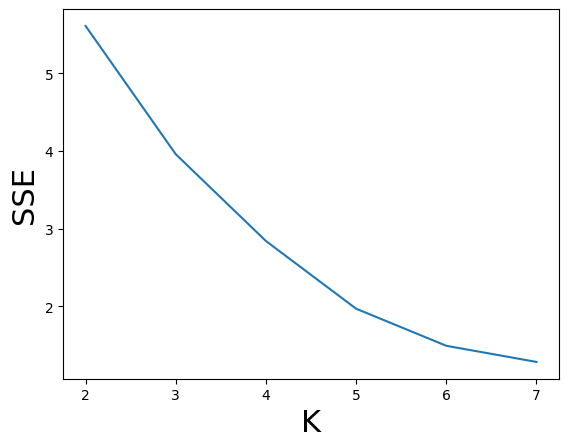

In [123]:
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(range(2, len(sse_list) + 2))
plt.show()

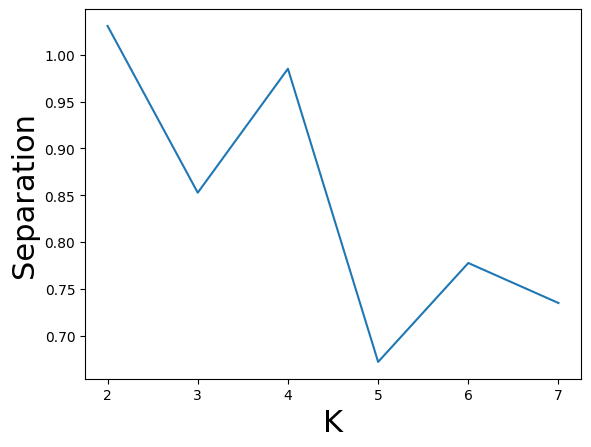

In [124]:
plt.plot(range(2, len(separations) + 2), separations)
plt.ylabel('Separation', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(range(2, len(separations) + 2))
plt.show()

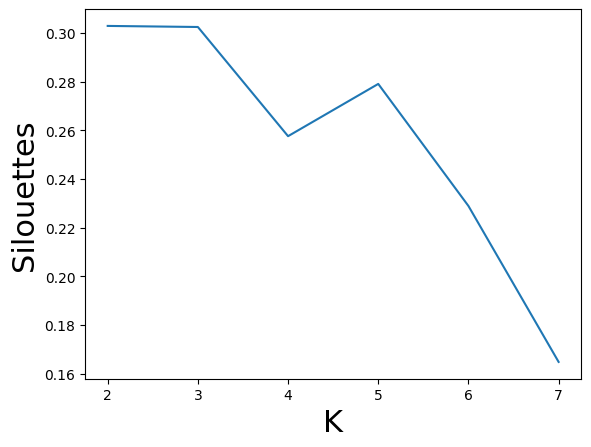

In [125]:
plt.plot(range(2, len(silouettes_) + 2), silouettes_)
plt.ylabel('Silouettes', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(range(2, len(silouettes_) + 2))
plt.show()

In [126]:
selected_k=3

kmeans = KMeans(n_clusters=selected_k, n_init=100, max_iter=500)
kmeans.fit(X)

KMeans(max_iter=500, n_clusters=3, n_init=100)

In [127]:
# sum up the metrics

print(f"SSE : {kmeans.inertia_}")
print(f"Separation : {metrics.davies_bouldin_score(X, kmeans.labels_)}")
print(f"Silhouette : {silhouette_score(X, kmeans.labels_)}")

SSE : 3.8167868958406936
Separation : 1.0249072517351456
Silhouette : 0.3227437702236318


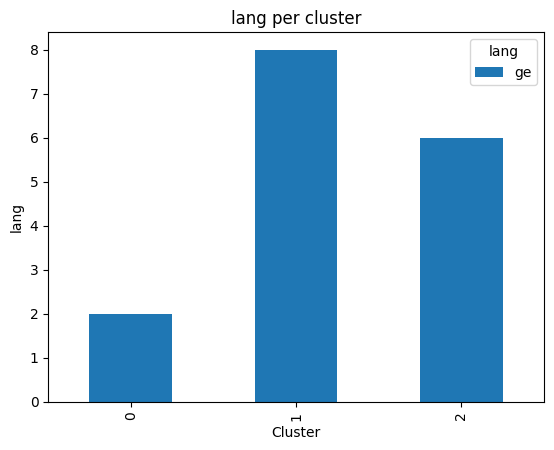

In [128]:
bot_xt_pct = pd.crosstab(kmeans.labels_, reader_grouped_df["lang"])
bot_xt_pct.plot(kind='bar', stacked=False, 
                   title=f'lang per cluster')
plt.xlabel('Cluster')
plt.ylabel("lang")
plt.show()

In [129]:
center = scaler.inverse_transform(kmeans.cluster_centers_)

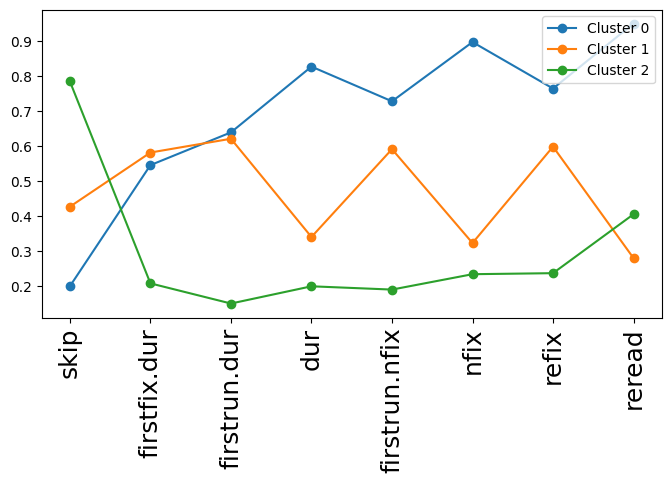

In [130]:
plt.figure(figsize=(8, 4))
for i in range(0, len(center)):
    plt.plot(kmeans.cluster_centers_[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(gaze_features)), gaze_features, fontsize=18, rotation=90)
plt.legend(fontsize=10)
plt.show()

In [131]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

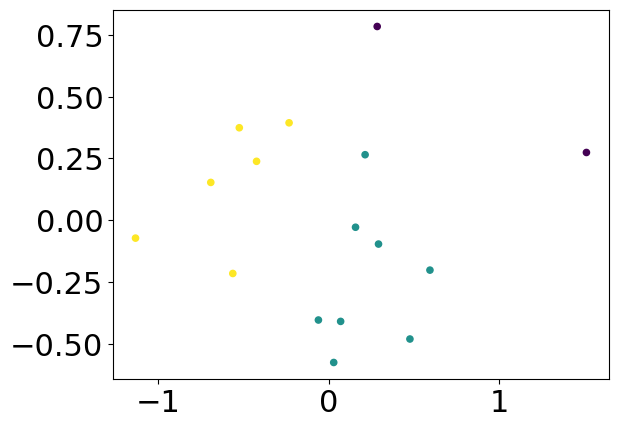

In [132]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

### Creating one dataset per cluster

In [133]:
readers_clusters = list()

for i in range(selected_k):
    readers_clusters.append(set(reader_grouped_df.loc[kmeans.labels_ == i, "uniform_id"]))
    
print(readers_clusters)

[{'ge_17', 'ge_6'}, {'ge_30', 'ge_12', 'ge_39', 'ge_53', 'ge_13', 'ge_10', 'ge_3', 'ge_47'}, {'ge_32', 'ge_8', 'ge_9', 'ge_41', 'ge_37', 'ge_1'}]


In [134]:
clustered_dfs = list()

for readers_cluster in readers_clusters:
    clustered_df = df_complete_common_user_lang[df_complete_common_user_lang.uniform_id.isin(readers_cluster)]
    clustered_dfs.append(clustered_df)

In [135]:
clustered_dfs

[        trialid  sentnum  ianum               ia lang uniform_id  skip  \
 202535      1.0      1.0    1.0               In   ge       ge_6   0.0   
 202536      1.0      1.0    2.0              der   ge       ge_6   0.0   
 202537      1.0      1.0    3.0            alten   ge       ge_6   0.0   
 202538      1.0      1.0    4.0        römischen   ge       ge_6   0.0   
 202539      1.0      1.0    5.0         Religion   ge       ge_6   0.0   
 ...         ...      ...    ...              ...  ...        ...   ...   
 222592     12.0      8.0  156.0      Regierungen   ge      ge_17   0.0   
 222593     12.0      8.0  157.0              und   ge      ge_17   1.0   
 222594     12.0      8.0  158.0  internationalen   ge      ge_17   0.0   
 222595     12.0      8.0  159.0   Organisationen   ge      ge_17   0.0   
 222596     12.0      8.0  160.0        einigten.   ge      ge_17   0.0   
 
         firstfix.dur  firstrun.dur     dur  firstrun.nfix  nfix  refix  reread  
 202535         

### Mean gaze features inside each clustered dataset

In [136]:
group_by_cols = ["trialid", "sentnum", "ianum", "ia", "lang"]
grouped_cols = ["skip", "firstfix.dur", "firstrun.dur", "dur", "firstrun.nfix", "nfix", "refix", "reread"]

for i in range(len(clustered_dfs)):    
    grouped_clusterd_df = group_by_users(clustered_dfs[i])
    
    grouped_clusterd_df.rename(columns={"skip" : "prob_skip", "refix" : "prob_refix", "reread" : "prob_reread"}, inplace=True)
    
    grouped_clusterd_df.ianum = grouped_clusterd_df.ianum.astype(int)
    grouped_clusterd_df.trialid = grouped_clusterd_df.trialid.astype(int)
    grouped_clusterd_df.trial_sentnum = grouped_clusterd_df.trial_sentnum.astype(int)
    
    clustered_dfs[i] = grouped_clusterd_df

Number of sentence after group : 115
Number of sentence after group : 115
Number of sentence after group : 115


In [137]:
for clustered_df in clustered_dfs:
    print(clustered_df[["prob_skip", "firstrun.dur", "dur", "firstrun.nfix", "nfix", "prob_refix", "prob_reread"]].corr())

               prob_skip  firstrun.dur       dur  firstrun.nfix      nfix  \
prob_skip       1.000000     -0.530335 -0.413302      -0.590838 -0.457387   
firstrun.dur   -0.530335      1.000000  0.678769       0.931769  0.646014   
dur            -0.413302      0.678769  1.000000       0.672372  0.972538   
firstrun.nfix  -0.590838      0.931769  0.672372       1.000000  0.699098   
nfix           -0.457387      0.646014  0.972538       0.699098  1.000000   
prob_refix     -0.346209      0.669830  0.617570       0.738393  0.662029   
prob_reread    -0.382208      0.265148  0.566664       0.293625  0.624942   

               prob_refix  prob_reread  
prob_skip       -0.346209    -0.382208  
firstrun.dur     0.669830     0.265148  
dur              0.617570     0.566664  
firstrun.nfix    0.738393     0.293625  
nfix             0.662029     0.624942  
prob_refix       1.000000     0.332661  
prob_reread      0.332661     1.000000  
               prob_skip  firstrun.dur       dur  first

In [138]:
for i, clustered_df in enumerate(clustered_dfs):
    print(f"Len dataset_{i} : {clustered_df.shape}")

Len dataset_0 : (2027, 14)
Len dataset_1 : (2027, 14)
Len dataset_2 : (2027, 14)


### Saving datasets

In [139]:
for i, clustered_df in enumerate(clustered_dfs):
    clustered_df.to_csv(f"datasets/{cluster_lang}/cluster_{i}_dataset.csv")

### see distribution of data based on trial id

we can use last twe trial to compute validation and test set

In [140]:
for i, clustered_df in enumerate(clustered_dfs):
    
    print(f"\t--- Cluster {i} ---")
    
    for trial in df.trialid.unique():
        print(f"Percentage of samples in {trial}-th trial : {np.sum(clustered_df.trialid == trial)/clustered_df.shape[0]:.2f}%")

    print()

	--- Cluster 0 ---
Percentage of samples in 1.0-th trial : 0.09%
Percentage of samples in 2.0-th trial : 0.08%
Percentage of samples in 3.0-th trial : 0.09%
Percentage of samples in 4.0-th trial : 0.09%
Percentage of samples in 5.0-th trial : 0.08%
Percentage of samples in 6.0-th trial : 0.08%
Percentage of samples in 7.0-th trial : 0.10%
Percentage of samples in 8.0-th trial : 0.07%
Percentage of samples in 9.0-th trial : 0.08%
Percentage of samples in 10.0-th trial : 0.09%
Percentage of samples in 11.0-th trial : 0.08%
Percentage of samples in 12.0-th trial : 0.08%

	--- Cluster 1 ---
Percentage of samples in 1.0-th trial : 0.09%
Percentage of samples in 2.0-th trial : 0.08%
Percentage of samples in 3.0-th trial : 0.09%
Percentage of samples in 4.0-th trial : 0.09%
Percentage of samples in 5.0-th trial : 0.08%
Percentage of samples in 6.0-th trial : 0.08%
Percentage of samples in 7.0-th trial : 0.10%
Percentage of samples in 8.0-th trial : 0.07%
Percentage of samples in 9.0-th trial 